In [1]:
import torch
import torchvision as tv

In [ ]:
train = tv.datasets.CIFAR10(root="../data/cifar10/",train=True,download=True)
test = tv.datasets.CIFAR10(root="../data/cifar10/", train=False, download=True)

torchvision包是服务于pytorch深度学习框架的,用来生成图片,视频数据集,和一些流行的模型类和预训练模型. 
torchvision由以下四个部分组成: 
1. torchvision.datasets : Data loaders for popular vision datasets 
2. torchvision.models : Definitions for popular model architectures, such as AlexNet, VGG, and ResNet and pre-trained models. 
3. torchvision.transforms : Common image transformations such as random crop, rotations etc. 
4. torchvision.utils : Useful stuff such as saving tensor (3 x H x W) as image to disk, given a mini-batch creating a grid of images, etc.

第一部分: torchvision.datasets
torchvision.datasets是继承torch.utils.data.Dataset的子类. 因此,可以使用torch.utils.data.DataLoader对它们进行多线程处理(python multiprocessing) 


In [4]:
tv.datasets.CIFAR10

torchvision.datasets.cifar.CIFAR10

In [17]:
dataloader = torch.utils.data.DataLoader(mnist_train,batch_sampler=64,shuffle=True,num_workers=0)

ValueError: batch_sampler option is mutually exclusive with batch_size, shuffle, sampler, and drop_last

In [13]:
mnist_train = tv.datasets.MNIST(root="./data/MNIST/.",train=True,transform=None, target_transform=None,download=True)
mnist_test = tv.datasets.MNIST(root="./data/MNIST/.",train=False,transform=None, target_transform=None,download=True)

In [10]:
dataset = tv.datasets.ImageFolder(root="./data/MNIST/MNIST/raw/",transform=None,target_transform=None)

RuntimeError: Found 0 files in subfolders of: ./data/MNIST/MNIST/raw/
Supported extensions are: .jpg,.jpeg,.png,.ppm,.bmp,.pgm,.tif,.tiff,.webp

In [16]:
mnist_train.data.shape

torch.Size([60000, 28, 28])

In [18]:
resnet = tv.models.resnet18(pretrained=False)

torchvision.transforms包含了常见的图像变化(预处理)操作.这些变化可以用torchvision.transforms.Compose链接在一起. 
torchvision.transforms中的变化, 可以分为以下几类: 
一: Transforms on PIL.Image 
1. Scale(size, interpolation=Image.BILINEAR) 
2. CenterCrop(size) - center-crops the image to the given size 
3. RandomCrop(size, padding=0) 
4. RandomHorizontalFlip() 
5. RandomSizedCrop(size, interpolation=Image.BILINEAR) 
6. Pad(padding, fill=0)


第四部分: torchvision.utils
utils嘛, 就是一些工具. 好像目前只有两个. 
1. torchvision.utils.make_grid(tensor, nrow=8, padding=2, normalize=False, range=None, scale_each=False) 

In [21]:
dir(tv.utils)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'irange',
 'make_grid',
 'math',
 'save_image',
 'torch']

In [25]:
import torchvision.transforms as Transforms
import torchvision.datasets as Datasets
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np
import random

In [36]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation="nearest")

In [22]:
import scipy.misc

In [27]:
lena = scipy.misc.face()
lena.shape

(768, 1024, 3)

In [29]:
img = Transforms.ToTensor()(lena)
print(img.size())

torch.Size([3, 768, 1024])


In [30]:
imgList = [img, img, img, img.clone().fill_(-10)]

In [31]:
imgList[-1]

tensor([[[-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         ...,
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.]],

        [[-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         ...,
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.]],

        [[-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         ...,
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.],
         [-10., -10., -10.,  ..., -10., -10., -10.]]]

make_grid的作用是将若干幅图像拼成一幅图像。其中padding的作用就是子图像与子图像之间的pad有多宽。

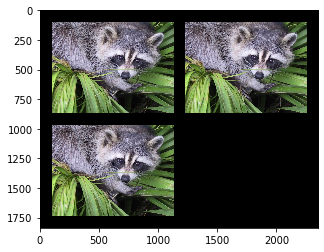

In [53]:
show(make_grid(imgList, padding=100, nrow=2, normalize=True,range=(0,1)))

In [54]:
from __future__ import print_function

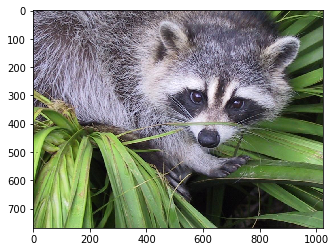

In [38]:
show(img)

In [2]:
# uniform distribution
torch.rand(4)

tensor([0.2467, 0.6106, 0.0498, 0.3232])

In [3]:
# normal distribution
torch.randn(2,2)

tensor([[-0.2429, -0.3656],
        [ 0.8981,  0.1785]])

In [4]:
# range random integer
torch.randint(1,10,(2,4))

tensor([[3, 6, 8, 2],
        [7, 1, 2, 3]])

In [5]:
x=torch.autograd.Variable(torch.Tensor([2]),requires_grad=True)
w=torch.autograd.Variable(torch.Tensor([3]),requires_grad=True)

b=torch.autograd.Variable(torch.Tensor([4]), requires_grad=True)

In [6]:
y=x*w+b*b

In [7]:
y.backward()

In [8]:
b.grad

tensor([8.])

In [9]:
x.grad_fn

## Simple Network

In [10]:
data = torch.linspace(1,60,)+torch.randn()

In [17]:
input_size=100
hidden_size=200
output_size=10

In [15]:
torch.nn.Sequential(
    torch.nn.Linear(input_size,hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size)
                   )

NameError: name 'output_size' is not defined

In [38]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [25]:
g=nx.read_graphml("/home/hzc/workshop/gitfile/gcn_tutorial/R/karate.graphml")

In [26]:
nx.adj_matrix(g)

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

In [27]:
for i in nx.get_node_attributes(g, "menbership").values():
    print(i)

In [36]:
nx.get_node_attributes(g,'membership').values()

dict_values([1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 2.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0])

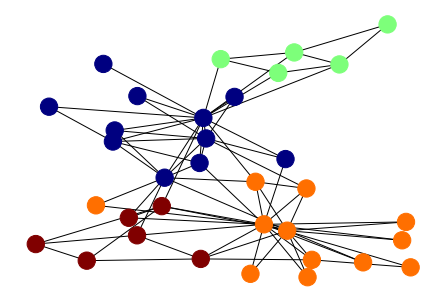

In [41]:
nx.draw(g, cmap=plt.get_cmap('jet'), node_color=np.log(list(nx.get_node_attributes(g,'membership').values())))
plt.show()

In [2]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'